In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1
## Delivery_time -> Predict delivery time using sorting time 

In [2]:
df = pd.read_csv('data/delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
# Renaming columns for easy accessibility
df.rename(columns={'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace=True)
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Visualising data

In [6]:
import warnings
warnings.filterwarnings('ignore')

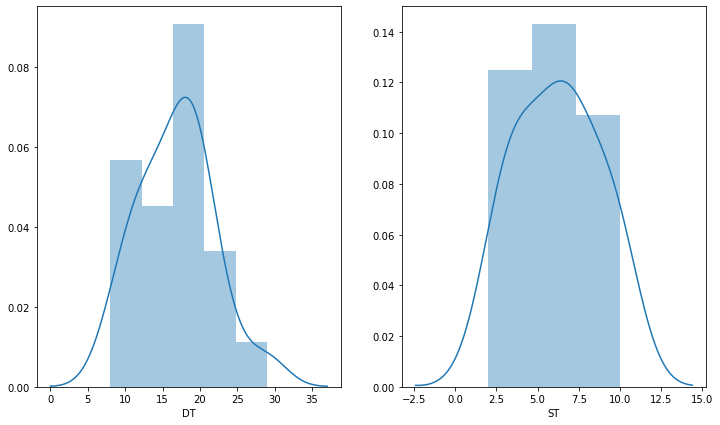

In [7]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.distplot(df.iloc[:,0])
plt.subplot(1,2,2)
sns.distplot(df.iloc[:,1])

# Applying sqrt transformations because data is moderately skewed

In [8]:
df2 = df.copy()

In [9]:
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df2.iloc[:,0] = np.sqrt(df2.iloc[:,0])
df2.iloc[:,1] = np.sqrt(df2.iloc[:,1])

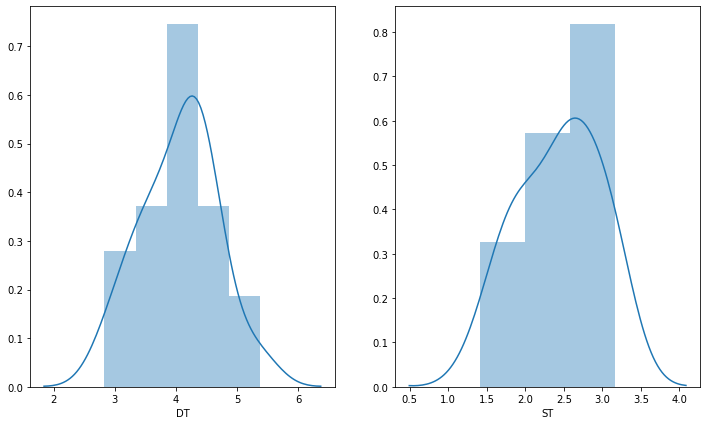

In [11]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.distplot(df2.iloc[:,0])
plt.subplot(1,2,2)
sns.distplot(df2.iloc[:,1])

Text(0, 0.5, 'Sorting Time')

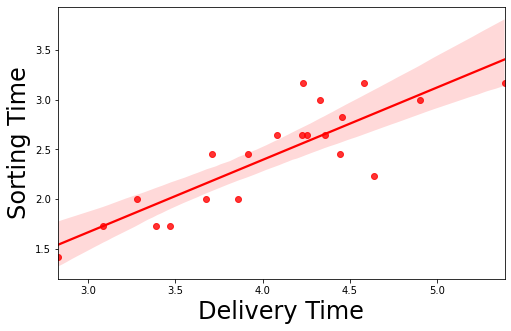

In [12]:
plt.figure(figsize = (8,5))
sns.regplot(x = df2.iloc[:,0] , y= df2.iloc[:,1] , color = 'r')
plt.xlabel('Delivery Time' , fontsize = 24)
plt.ylabel('Sorting Time' , fontsize = 24)

## It can be observed that the linear regression would be best fit for this model

## Correlation analysis

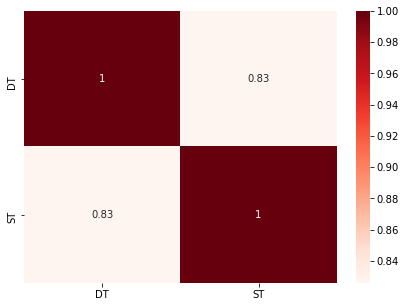

In [13]:
plt.figure(figsize = (7,5))
sns.heatmap(data=df.corr() , cmap = 'Reds' , annot = True)

# Fitting a linear regression model

In [14]:
import statsmodels.formula.api as smf
model = smf.ols('DT~ST', data = df2).fit()

In [15]:
model.params

Intercept    1.613479
ST           1.002217
dtype: float64

In [16]:
model.tvalues


Intercept    4.628248
ST           7.152817
dtype: float64

In [17]:
 model.pvalues

Intercept    1.833621e-04
ST           8.475706e-07
dtype: float64

In [18]:
# R-squared value
model.rsquared , model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

# Predicting values

In [19]:
y_pred = model.predict()
y_pred

array([4.78276673, 3.61791244, 4.06839864, 4.62012932, 4.78276673,
       4.06839864, 4.2650953 , 3.34936923, 4.78276673, 4.62012932,
       4.44817609, 3.61791244, 4.2650953 , 3.34936923, 3.34936923,
       3.61791244, 4.06839864, 4.2650953 , 3.03082738, 4.2650953 ,
       3.85450375])

In [20]:
result = pd.DataFrame({'Sorting Time': df.iloc[:,1], 'Actual Delivery Time': df.iloc[:,0] , 'sqrt_Predicted DT': y_pred \
                       , 'Predict DT' : np.square(y_pred)})

In [21]:
result.head()

,Sorting Time,Actual Delivery Time,sqrt_Predicted DT,Predict DT
0,10,21.00,4.782767,22.874858
1,4,13.50,3.617912,13.089290
2,6,19.75,4.068399,16.551868
3,9,24.00,4.620129,21.345595
4,10,29.00,4.782767,22.874858


In [22]:
print('Model accuracy = %.2f'%model.rsquared)

Model accuracy = 0.73


# Q2
## Salary_hike -> Build a prediction model for Salary_hike

In [23]:
df2 = pd.read_csv('data/Salary_Data.csv')
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
df2.shape

(30, 2)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


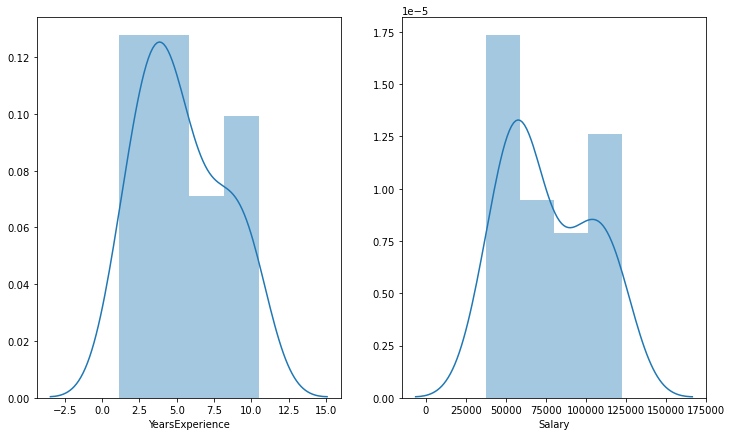

In [26]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.distplot(df2.iloc[:,0])
plt.subplot(1,2,2)
sns.distplot(df2.iloc[:,1])

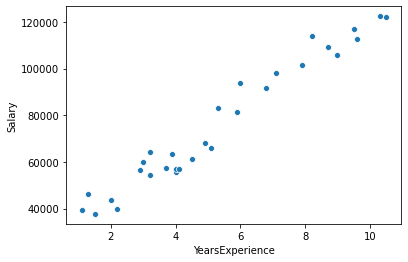

In [27]:
sns.scatterplot(x = df2.iloc[:,0] , y = df2.iloc[:,1])

# Since data is highly right skewed , we will apply log transformation

In [28]:
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
df3 = df2.copy()
df3.iloc[:,0] = np.log(df2.iloc[:,0])
df3.iloc[:,1] = np.log(df2.iloc[:,1])

In [30]:
df3.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


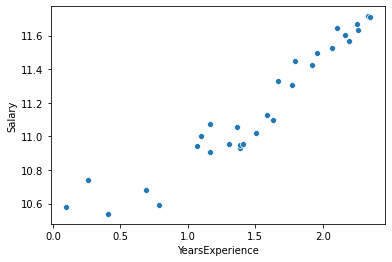

In [31]:
sns.scatterplot(x = df3.iloc[:,0] , y = df3.iloc[:,1])

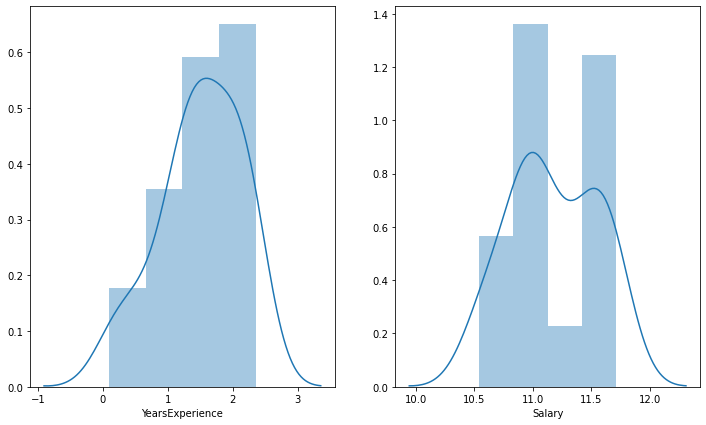

In [32]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.distplot(df3.iloc[:,0])
plt.subplot(1,2,2)
sns.distplot(df3.iloc[:,1])

Text(0, 0.5, 'Salary')

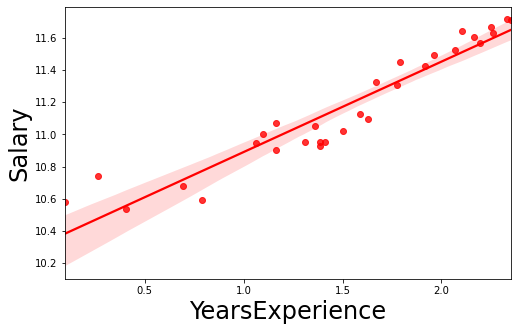

In [33]:
plt.figure(figsize = (8,5))
sns.regplot(x = df3.iloc[:,0] , y= df3.iloc[:,1] , color = 'r')
plt.xlabel('YearsExperience' , fontsize = 24)
plt.ylabel('Salary' , fontsize = 24)

## Linear regression model will be a good fit


# Correlation Analysis

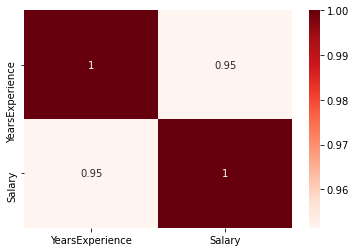

In [34]:
sns.heatmap(df3.corr() , annot = True , cmap = 'Reds')

# Fitting Linear Regression model

In [35]:
model3 = smf.ols('Salary~YearsExperience',data = df3).fit()

In [36]:
model3.params

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [37]:
model3.pvalues

Intercept          9.073132e-45
YearsExperience    7.395278e-16
dtype: float64

In [38]:
model3.rsquared , model3.rsquared_adj

(0.905215072581715, 0.9018298966024905)

# Predicting values

In [39]:
predictions = model3.predict()

In [40]:
result = pd.DataFrame({'Years Experience': np.exp(df3.iloc[:,0]), 'Actual Salary': np.exp(df3.iloc[:,1]),\
                       'log_PredictedSalary': predictions , 'Predicted Salary': np.exp(predictions)})

In [41]:
result.head()

,Years Experience,Actual Salary,log_PredictedSalary,Predicted Salary
0,1.1,39343.0,10.381616,32261.052293
1,1.3,46205.0,10.475515,35437.122429
2,1.5,37731.0,10.555951,38405.293942
3,2.0,43525.0,10.717653,45145.842502
4,2.2,39891.0,10.771226,47630.388981


In [42]:
print('Rsquared score: %.2f'%model3.rsquared)

Rsquared score: 0.91
